In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("Real estate.csv")
df.head(2)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2


In [3]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [6]:
cols=list(df.columns)
cols

['No',
 'X1 transaction date',
 'X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude',
 'Y house price of unit area']

In [7]:
df.columns=df.columns.str.replace(' ','_')
df.columns=df.columns.str.lower()

In [8]:
cols=list(df.columns)
cols

['no',
 'x1_transaction_date',
 'x2_house_age',
 'x3_distance_to_the_nearest_mrt_station',
 'x4_number_of_convenience_stores',
 'x5_latitude',
 'x6_longitude',
 'y_house_price_of_unit_area']

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


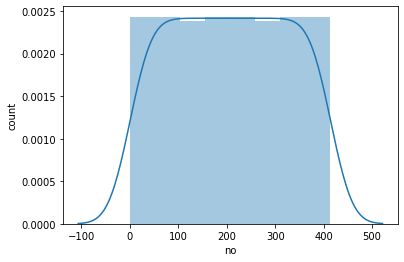

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


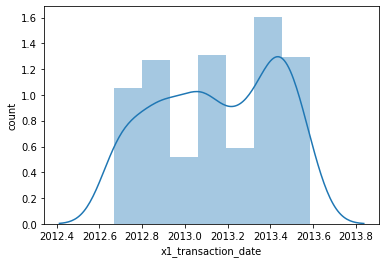

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


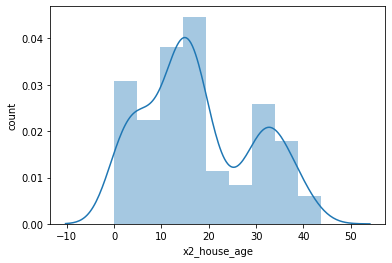

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


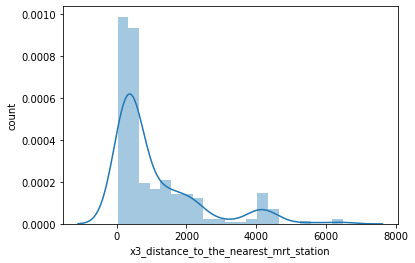

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


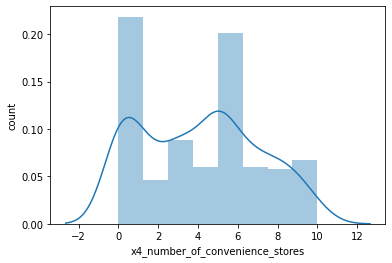

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


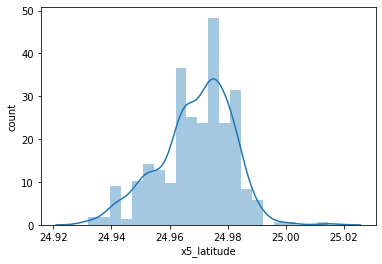

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


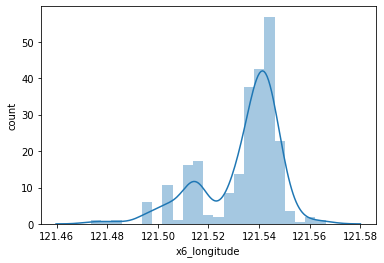

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


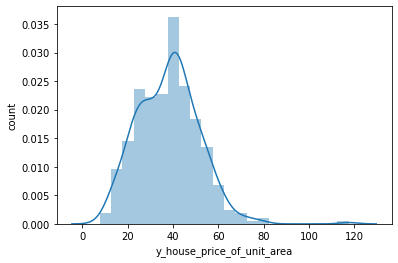

In [9]:
for x in cols:
    sns.distplot(df[x])
    plt.xlabel(x)
    plt.ylabel("count")
    plt.show()

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


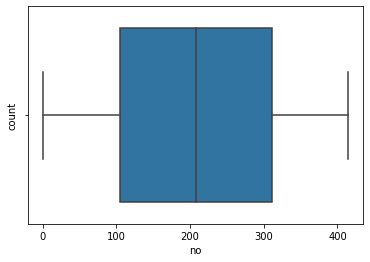

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


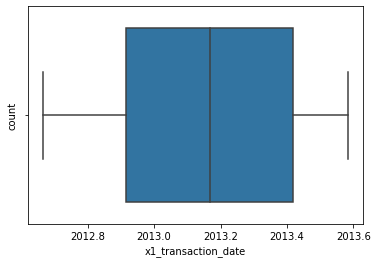

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


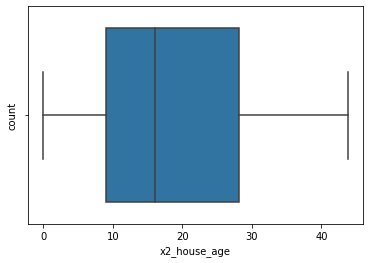

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


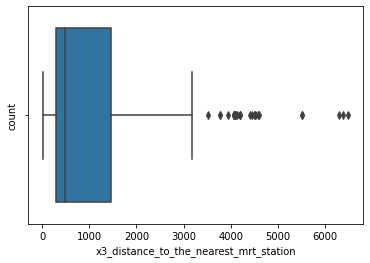

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


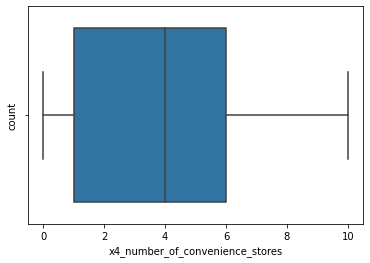

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


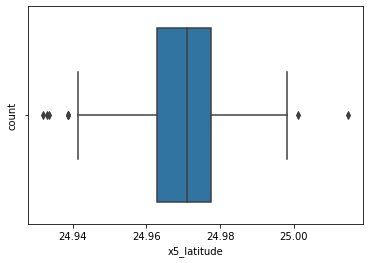

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


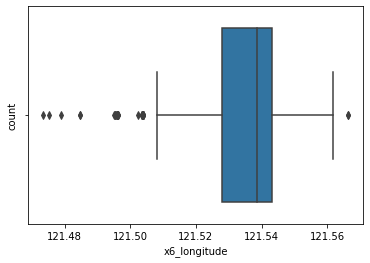

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


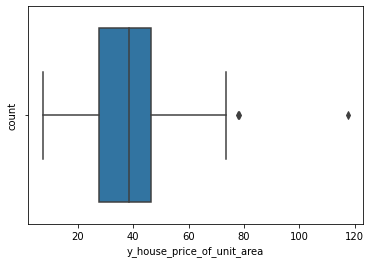

In [10]:
for x in cols:
    sns.boxplot(df[x])
    plt.xlabel(x)
    plt.ylabel("count")
    plt.show()

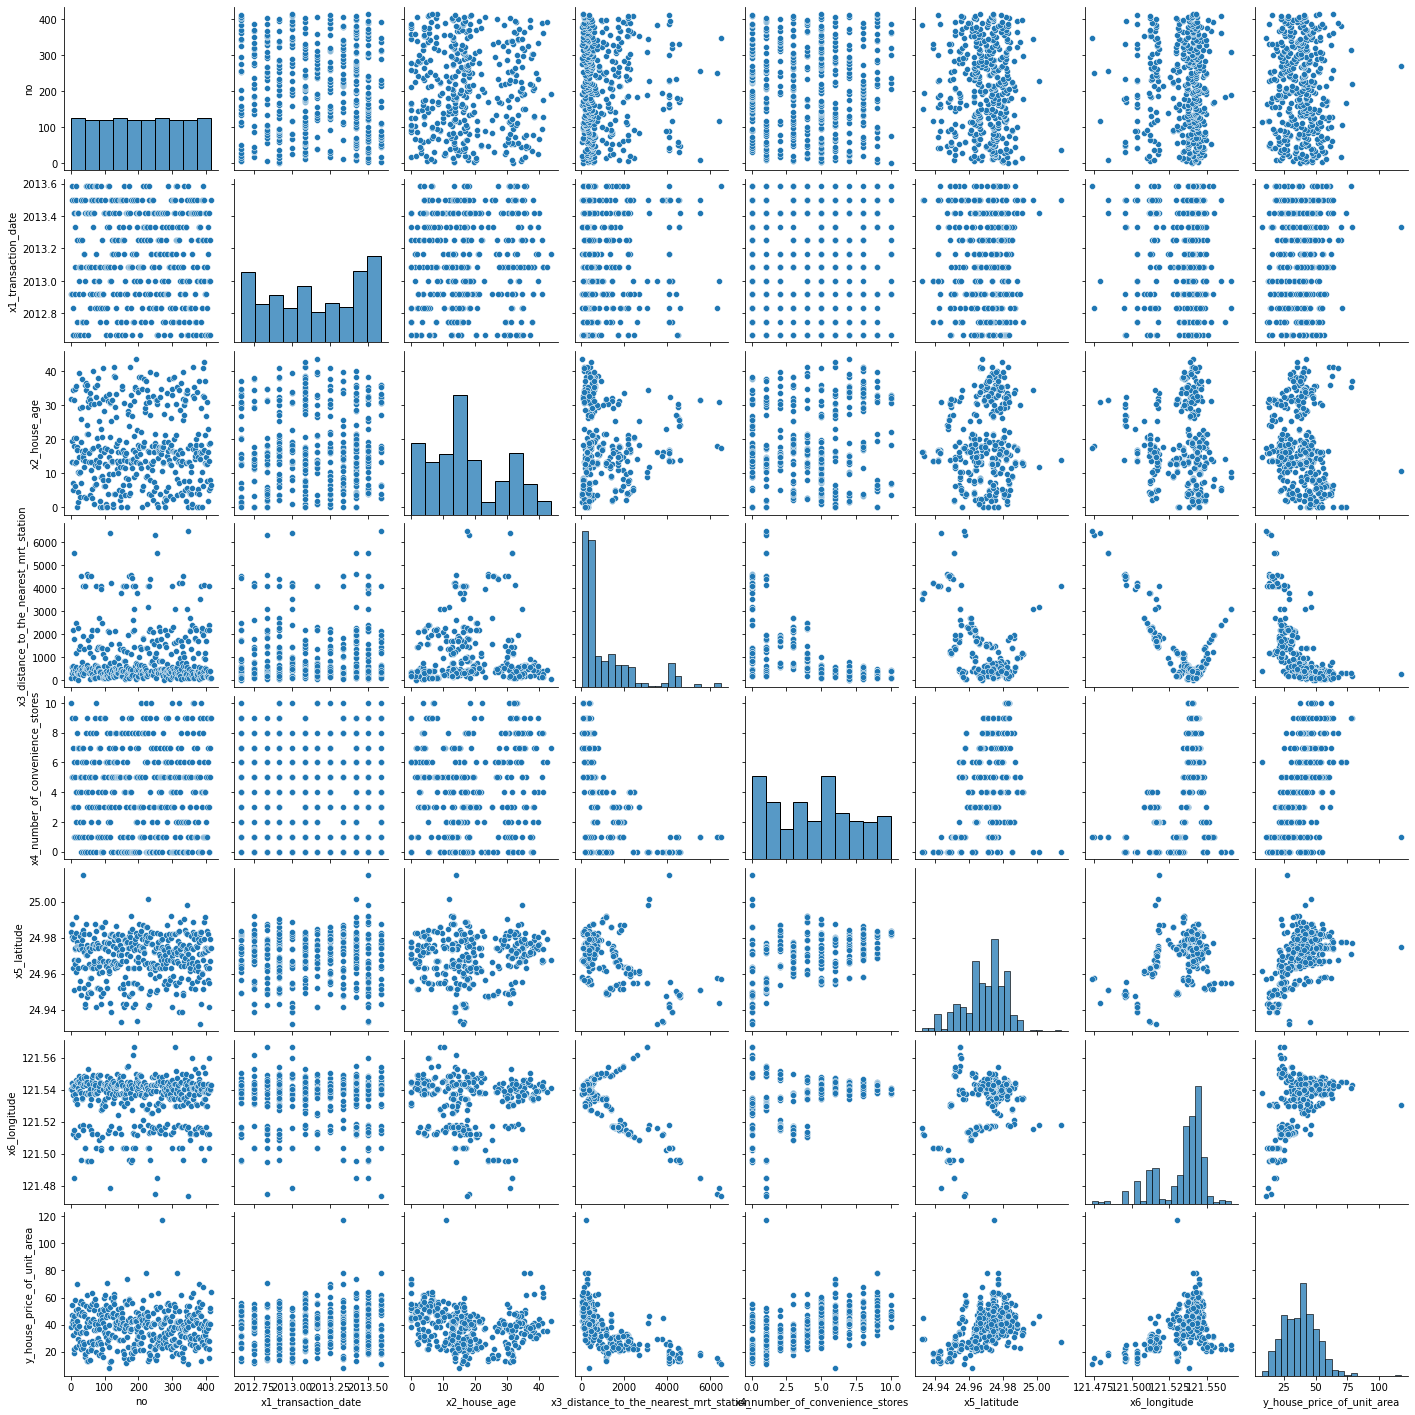

In [11]:
sns.pairplot(df)
plt.show()

In [12]:
cols

['no',
 'x1_transaction_date',
 'x2_house_age',
 'x3_distance_to_the_nearest_mrt_station',
 'x4_number_of_convenience_stores',
 'x5_latitude',
 'x6_longitude',
 'y_house_price_of_unit_area']

In [13]:
df.rename(columns={'no':'No'})

,No,x1_transaction_date,x2_house_age,x3_distance_to_the_nearest_mrt_station,x4_number_of_convenience_stores,x5_latitude,x6_longitude,y_house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [14]:
df.columns

Index(['no', 'x1_transaction_date', 'x2_house_age',
       'x3_distance_to_the_nearest_mrt_station',
       'x4_number_of_convenience_stores', 'x5_latitude', 'x6_longitude',
       'y_house_price_of_unit_area'],
      dtype='object')

In [15]:
df.dtypes

no                                          int64
x1_transaction_date                       float64
x2_house_age                              float64
x3_distance_to_the_nearest_mrt_station    float64
x4_number_of_convenience_stores             int64
x5_latitude                               float64
x6_longitude                              float64
y_house_price_of_unit_area                float64
dtype: object

In [16]:
df.head(3)

,no,x1_transaction_date,x2_house_age,x3_distance_to_the_nearest_mrt_station,x4_number_of_convenience_stores,x5_latitude,x6_longitude,y_house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3


In [17]:
df['x1_transaction_date']=pd.to_datetime(df['x1_transaction_date'],format='%Y%m%d',errors='coerce')

In [18]:
df1=df.drop(columns=['x1_transaction_date'])

In [19]:
df1.head()

,no,x2_house_age,x3_distance_to_the_nearest_mrt_station,x4_number_of_convenience_stores,x5_latitude,x6_longitude,y_house_price_of_unit_area
0,1,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,5.0,390.56840,5,24.97937,121.54245,43.1


In [20]:
df1.corr()

,no,x2_house_age,x3_distance_to_the_nearest_mrt_station,x4_number_of_convenience_stores,x5_latitude,x6_longitude,y_house_price_of_unit_area
no,1.000000,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
x2_house_age,-0.032808,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
x3_distance_to_the_nearest_mrt_station,-0.013573,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
x4_number_of_convenience_stores,-0.012699,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
x5_latitude,-0.010110,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
x6_longitude,-0.011059,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
y_house_price_of_unit_area,-0.028587,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<AxesSubplot:>

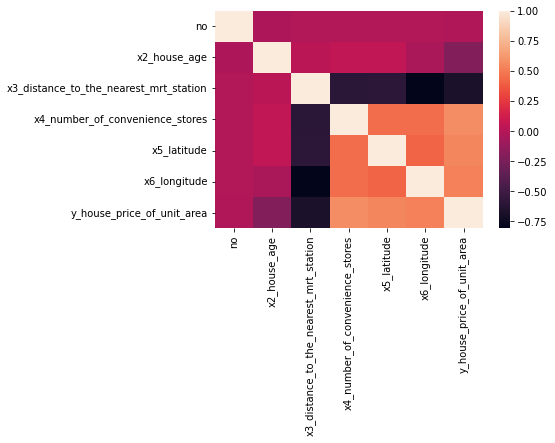

In [21]:
sns.heatmap(df1.corr())

In [22]:
# n_cols=cols
# n_cols.remove('No')
# ncols
cols

['no',
 'x1_transaction_date',
 'x2_house_age',
 'x3_distance_to_the_nearest_mrt_station',
 'x4_number_of_convenience_stores',
 'x5_latitude',
 'x6_longitude',
 'y_house_price_of_unit_area']

In [23]:
# find IQRS
# for col in cols:
#     q1=df[col].percentile(0.10)
#     q1

In [24]:
df.head()

,no,x1_transaction_date,x2_house_age,x3_distance_to_the_nearest_mrt_station,x4_number_of_convenience_stores,x5_latitude,x6_longitude,y_house_price_of_unit_area
0,1,NaT,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,NaT,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,NaT,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,NaT,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,NaT,5.0,390.56840,5,24.97937,121.54245,43.1


In [25]:
# Deviring depedendt variables and target variabeles
x=df.iloc[0:,2:7]
x

,x2_house_age,x3_distance_to_the_nearest_mrt_station,x4_number_of_convenience_stores,x5_latitude,x6_longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381
410,5.6,90.45606,9,24.97433,121.54310
411,18.8,390.96960,7,24.97923,121.53986
412,8.1,104.81010,5,24.96674,121.54067


In [26]:
y=df.iloc[:,-1]
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: y_house_price_of_unit_area, Length: 414, dtype: float64

In [27]:
x1=np.array(x).reshape(-1,1)

In [28]:
y1=np.array(x).reshape(-1,1)

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,random_state=0,train_size=.80)

In [30]:
linereg=LinearRegression()
linereg.fit(x1,y1)

LinearRegression()

In [31]:
y_pred=linereg.predict(x1)
y_pred

array([[ 32.     ],
       [ 84.87882],
       [ 10.     ],
       ...,
       [  9.     ],
       [ 24.97433],
       [121.5431 ]])

In [32]:
y_pred.ndim

2

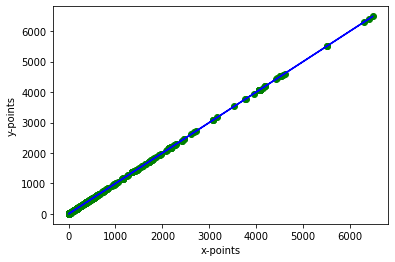

In [33]:
# Draw scatter plot
plt.scatter(x1,y1,color="green")
plt.plot(x1,y_pred,color="blue")
plt.xlabel("x-points")
plt.ylabel("y-points")
plt.show()

No handles with labels found to put in legend.


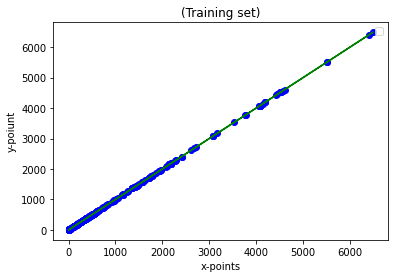

In [34]:
# plotting training set
plt.scatter(x_train,y_train,color="blue")
plt.plot(x_train,linereg.predict(x_train),color="green")
plt.legend()
plt.title('(Training set)')
plt.xlabel("x-points")
plt.ylabel("y-poiunt")
plt.show()

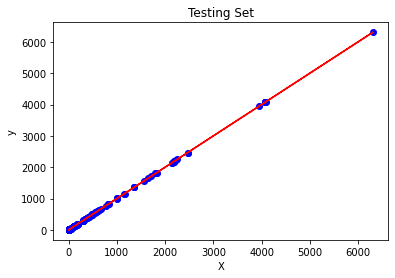

In [35]:
# plotiing testing set
plt.scatter(x_test,y_test,color="blue")
plt.plot(x_test,linereg.predict(x_test),color="red")
plt.title("Testing Set")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [36]:
print("slope",linereg.coef_)
print("intercept",linereg.intercept_)

slope [[1.]]
intercept [-1.13686838e-13]


In [37]:
linereg.score(x1,y1)

1.0

In [38]:
#Feature scaling 
# Acutally feature Scaling will do after spliting the data then we build the model but in this i want wanna check any difference
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_test

array([[-0.33804468],
       [ 0.05836308],
       [ 0.46798595],
       [-0.33534827],
       [-0.17975908],
       [ 2.84363349],
       [-0.17976517],
       [-0.33804468],
       [-0.3451405 ],
       [-0.17973916],
       [-0.17975871],
       [-0.34088301],
       [-0.31683903],
       [-0.32882012],
       [-0.31680058],
       [-0.35223633],
       [-0.3168256 ],
       [-0.30682307],
       [-0.31679149],
       [-0.17973137],
       [-0.3451405 ],
       [-0.35223633],
       [ 1.98015863],
       [-0.34655967],
       [-0.33946385],
       [-0.31680148],
       [-0.34088301],
       [-0.31678393],
       [-0.31683815],
       [-0.32896203],
       [-0.22386432],
       [ 2.74881912],
       [-0.31679131],
       [-0.17974763],
       [-0.31420272],
       [-0.29348293],
       [-0.32754287],
       [-0.35223633],
       [-0.31680163],
       [-0.34655967],
       [-0.34655967],
       [ 0.46975536],
       [ 0.28815273],
       [ 1.57802426],
       [ 5.25054592],
       [-0

In [39]:
# Building the model 2nd time
from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(x_train,y_train)

LinearRegression()

In [40]:
predcty=model2.predict(x_test)
predcty

array([[ 1.00000000e+01],
       [ 2.89324800e+02],
       [ 5.77961500e+02],
       [ 1.19000000e+01],
       [ 1.21534380e+02],
       [ 2.25193800e+03],
       [ 1.21530090e+02],
       [ 1.00000000e+01],
       [ 5.00000000e+00],
       [ 1.21548420e+02],
       [ 1.21534640e+02],
       [ 8.00000000e+00],
       [ 2.49423500e+01],
       [ 1.65000000e+01],
       [ 2.49694500e+01],
       [-1.13686838e-13],
       [ 2.49518200e+01],
       [ 3.20000000e+01],
       [ 2.49758500e+01],
       [ 1.21553910e+02],
       [ 5.00000000e+00],
       [-1.13686838e-13],
       [ 1.64349900e+03],
       [ 4.00000000e+00],
       [ 9.00000000e+00],
       [ 2.49688100e+01],
       [ 8.00000000e+00],
       [ 2.49811800e+01],
       [ 2.49429700e+01],
       [ 1.64000000e+01],
       [ 9.04560600e+01],
       [ 2.18512800e+03],
       [ 2.49759800e+01],
       [ 1.21542450e+02],
       [ 2.68000000e+01],
       [ 4.14000000e+01],
       [ 1.74000000e+01],
       [-1.13686838e-13],
       [ 2.4

In [41]:
print("slope",linereg.coef_)
print("intercept",linereg.intercept_)

slope [[1.]]
intercept [-1.13686838e-13]
